In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/home/wzarzecki/ds_10000x/results/interventions/discriminant_coefs_2_100x/lambda_x_seed_changes/lambda_x_seed_thr_0p15_beta.csv', index_col=0)
df.head()

,-5.0,-4.0,-3.0,-2.0,-1.0,0.0,1.0,2.0,3.0,4.0,5.0
design_0,0.753846,0.859649,1.188679,1.509804,3.448276,2.052632,2.250000,2.076923,2.102564,2.076923,2.305556
design_1,0.000000,0.151163,0.207317,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
design_10,0.273810,0.345238,0.526316,1.079365,0.720000,5.473684,5.238095,2.750000,2.757576,2.727273,2.806452
design_11,0.761905,1.063830,1.016129,0.803030,1.102041,0.887097,0.934426,1.277778,1.346154,1.313725,1.214286
design_12,1.510638,0.966102,0.089109,0.796875,1.377778,3.640000,3.103448,3.103448,3.103448,3.103448,3.103448


In [3]:
df.loc["design_0"]

-5.0    0.753846
-4.0    0.859649
-3.0    1.188679
-2.0    1.509804
-1.0    3.448276
0.0     2.052632
1.0     2.250000
2.0     2.076923
3.0     2.102564
4.0     2.076923
5.0     2.305556
Name: design_0, dtype: float64

/tmp/ipykernel_2237530/2807626052.py:18: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


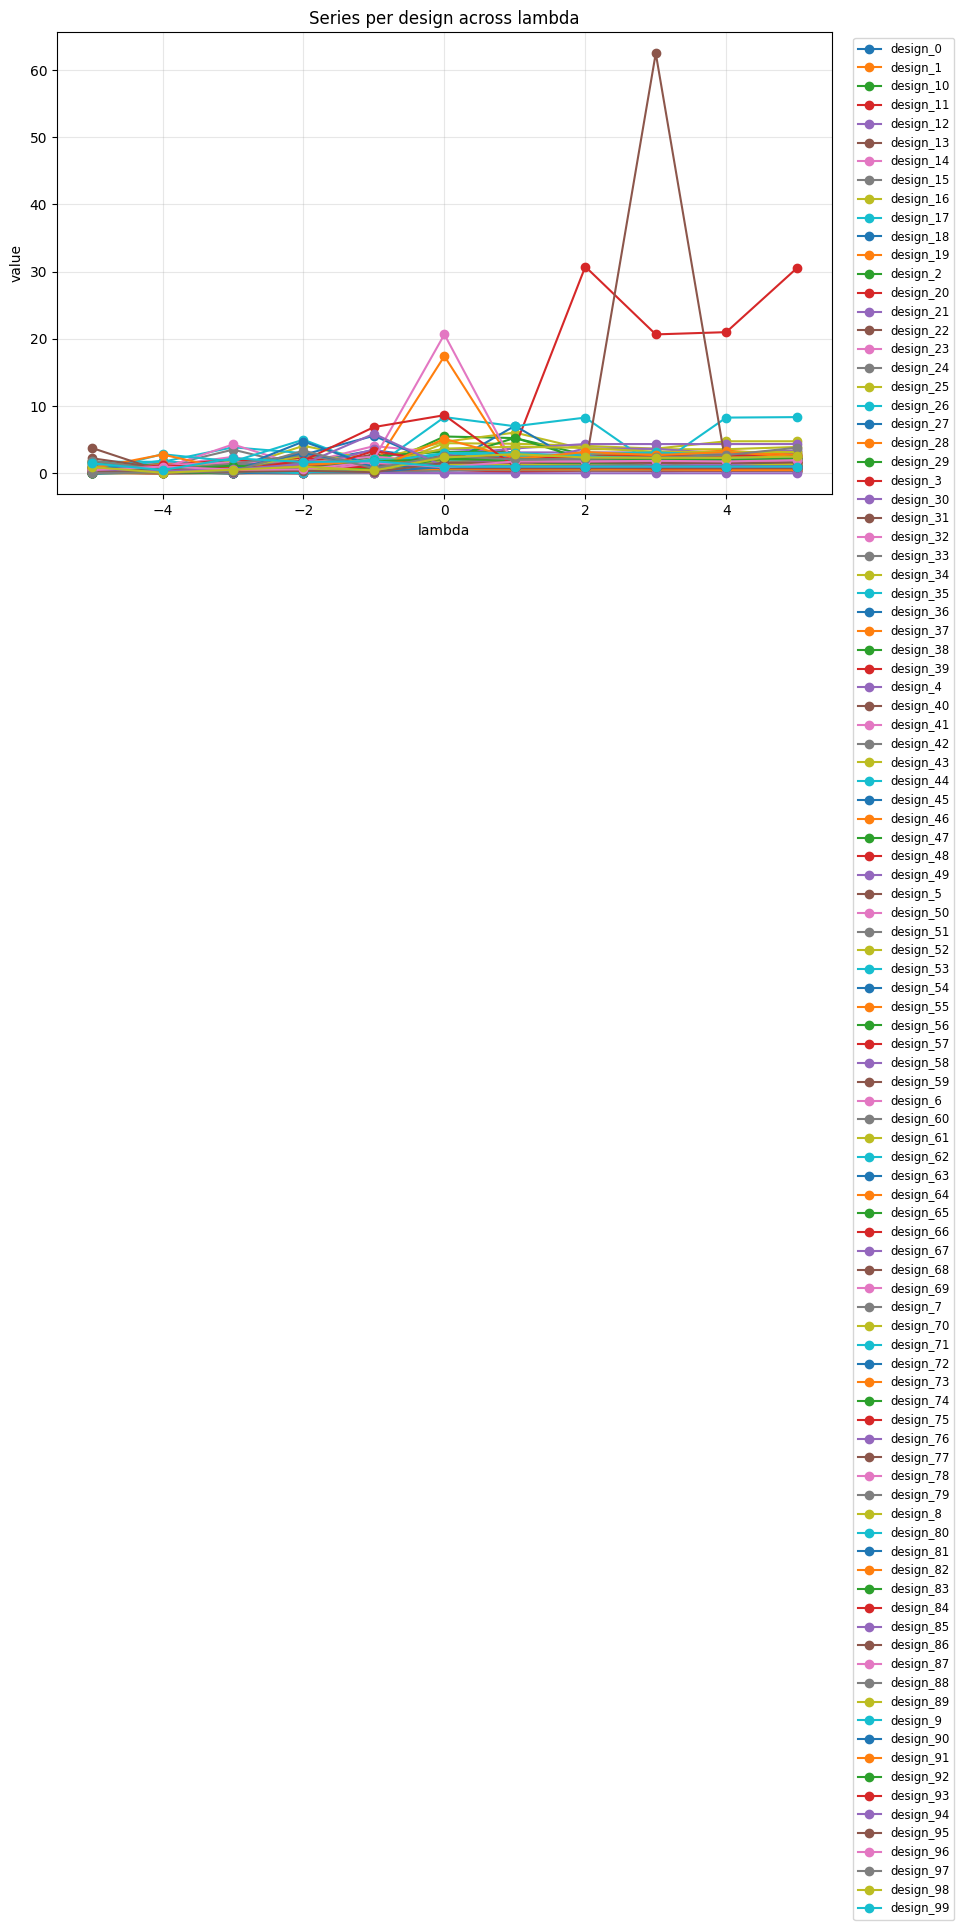

In [4]:
import matplotlib.pyplot as plt

# Ensure columns are numeric and sorted for x-axis
x = pd.to_numeric(df.columns)
order = x.argsort()
x = x[order]

plt.figure(figsize=(10, 6))
for row_name, row_values in df.iterrows():
    y = row_values.values[order]
    plt.plot(x, y, marker='o', linewidth=1.5, label=row_name)

plt.xlabel('lambda')
plt.ylabel('value')
plt.title('Series per design across lambda')
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', fontsize='small')
plt.tight_layout()
plt.show()


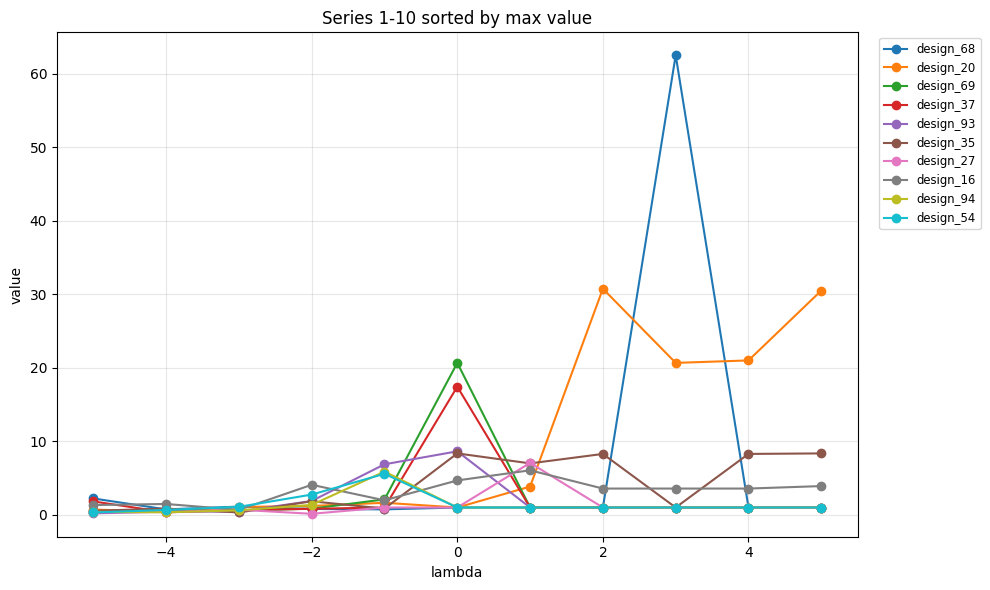

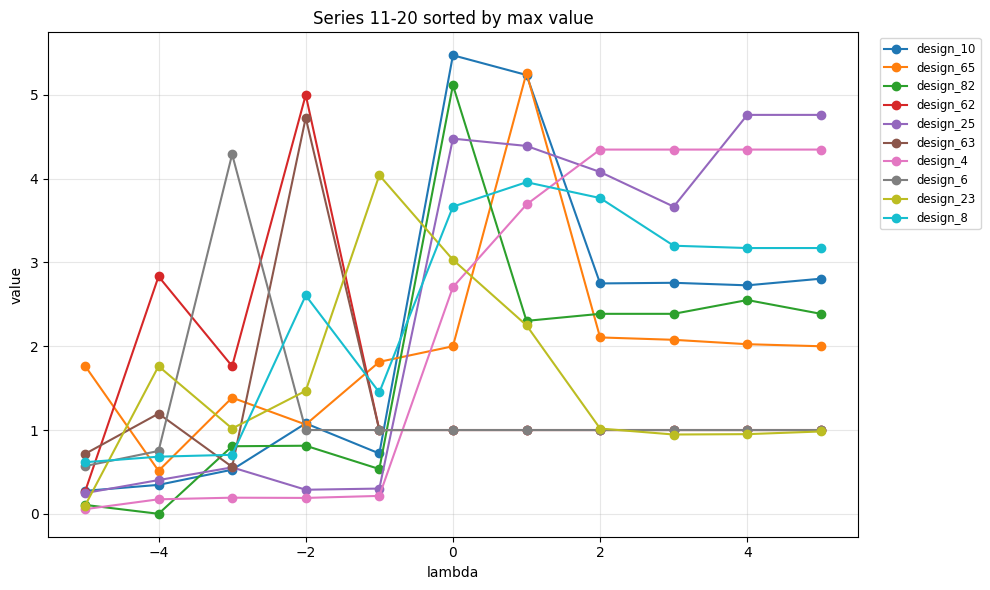

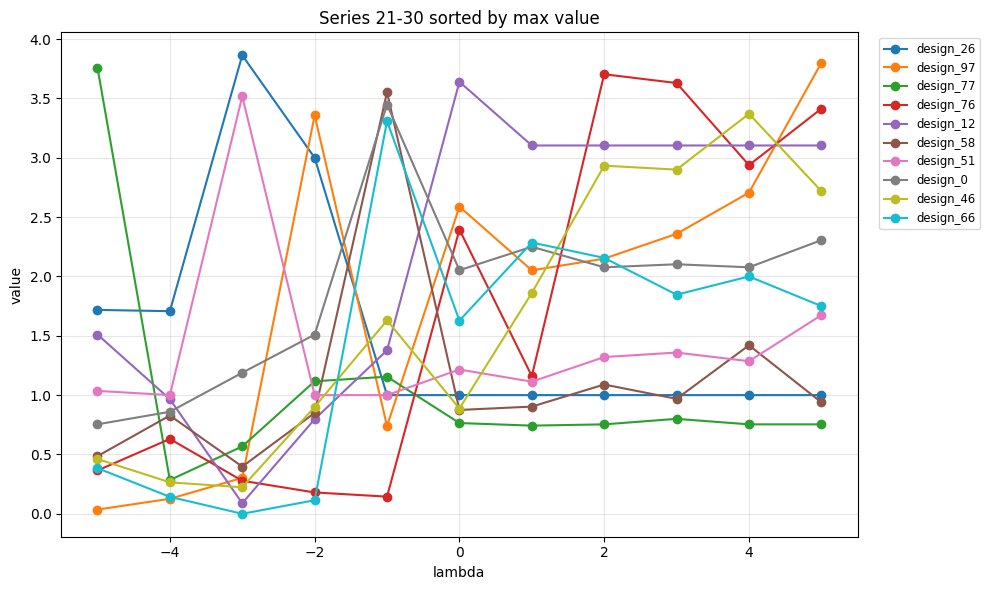

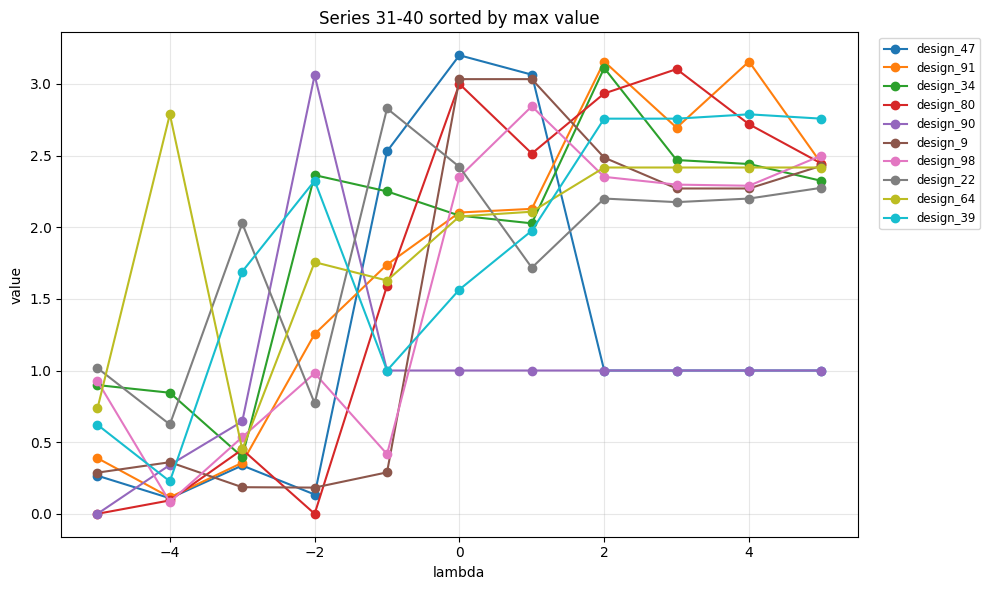

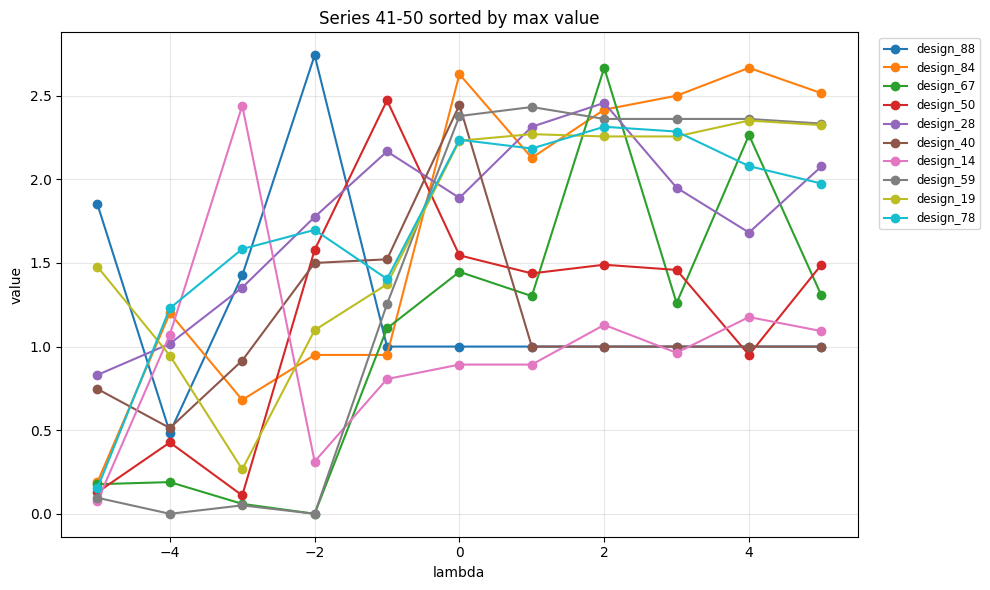

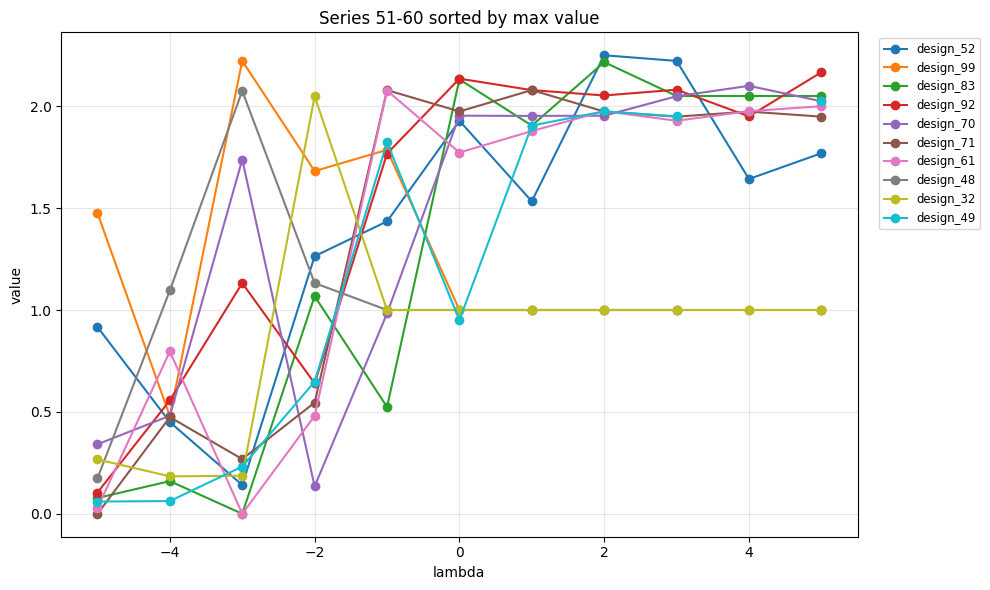

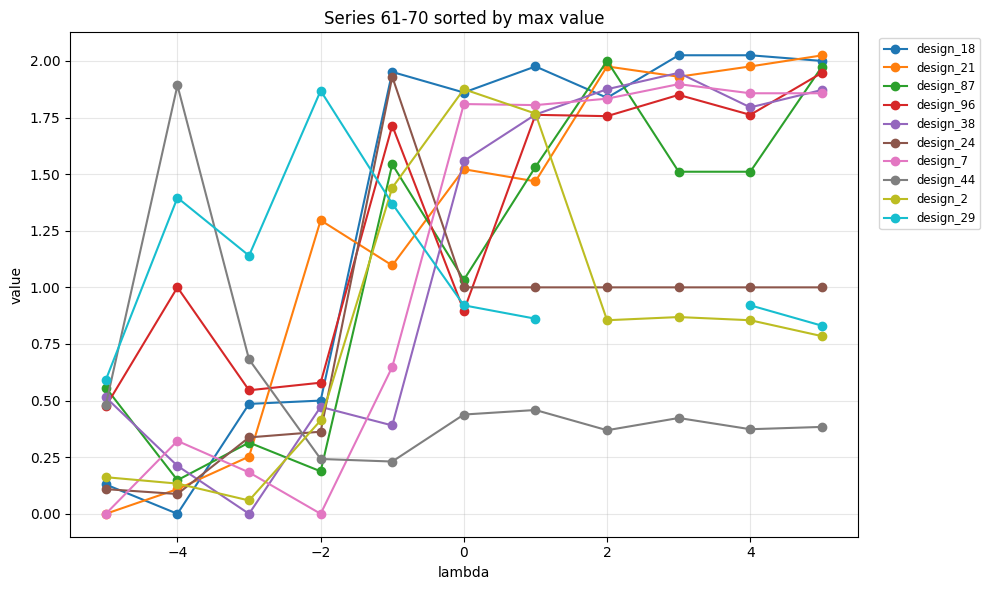

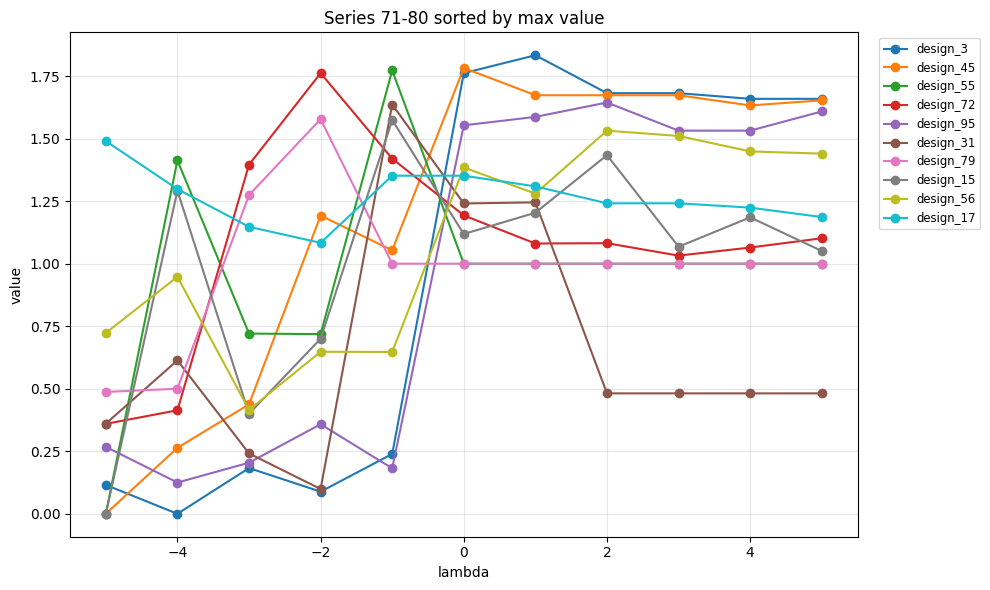

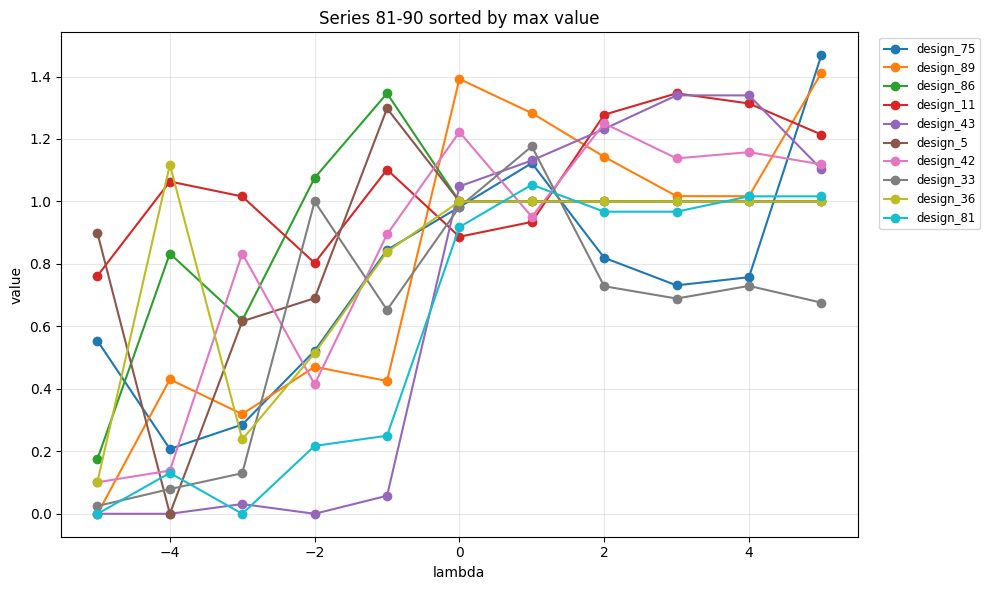

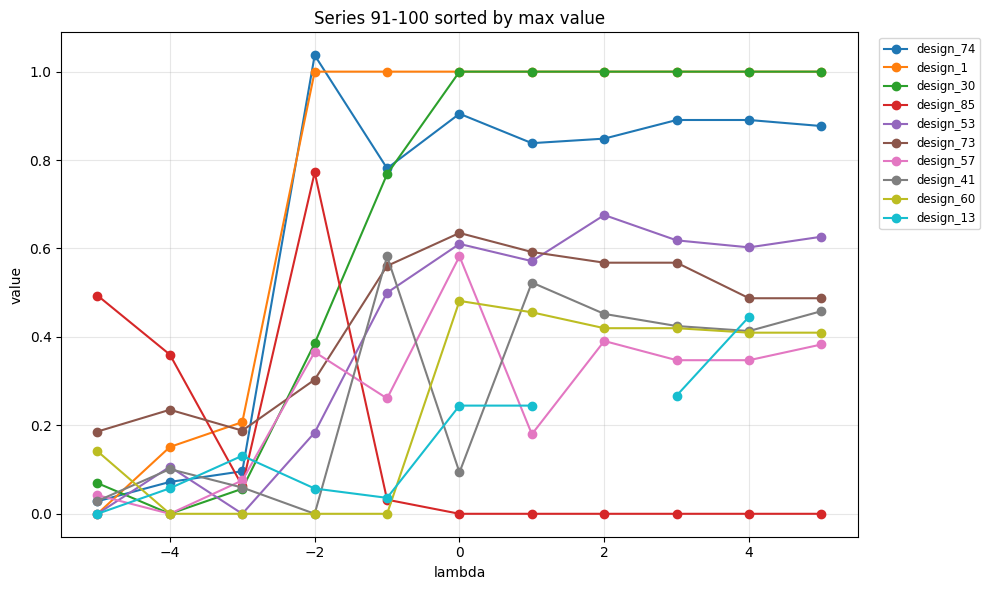

In [5]:
import matplotlib.pyplot as plt

# Sort rows by their maximum value (descending)
sorted_rows = df.max(axis=1).sort_values(ascending=False).index

# Prepare x-axis from numeric-sorted column names
x = pd.to_numeric(df.columns)
order = x.argsort()
x = x[order]

# Create a new pane (figure) for each 10 series rows
for start in range(0, len(sorted_rows), 10):
    group = sorted_rows[start:start+10]
    plt.figure(figsize=(10, 6))
    for row_name in group:
        y = df.loc[row_name].values[order]
        plt.plot(x, y, marker='o', linewidth=1.5, label=row_name)
    plt.xlabel('lambda')
    plt.ylabel('value')
    plt.title(f'Series {start+1}-{min(start+10, len(sorted_rows))} sorted by max value')
    plt.grid(True, alpha=0.3)
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', fontsize='small')
    plt.tight_layout()
    plt.show()
